## Results VGG16 non trainable

* ImageNet weights frozen
* only classifier layer trainable


In [7]:
import numpy as np
import os
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.losses import BinaryCrossentropy
import sklearn
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from tensorflow.keras.applications import VGG16


In [2]:
img_height=224
img_width=224
batch_size=32

In [3]:
#load test data

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'E:\Babette\MasterThesis\GoldStandard_tvt\test',
    shuffle=False,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )


Found 2622 files belonging to 2 classes.


['0_layout', '1_Genuine']


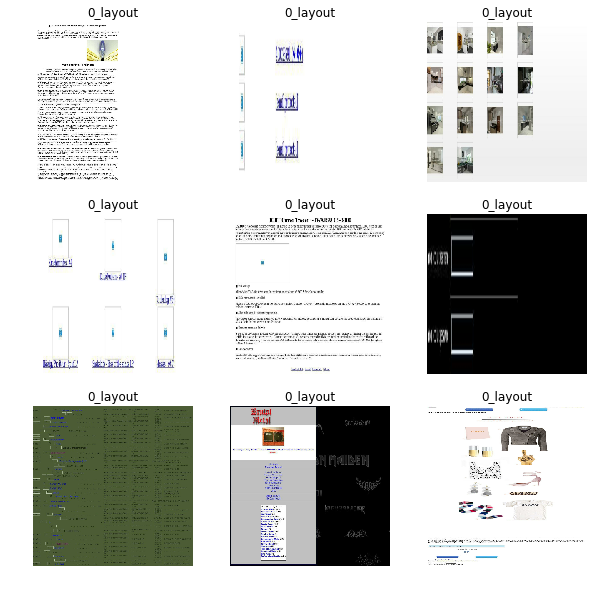

In [4]:
import matplotlib.pyplot as plt

class_names = test_ds.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [10]:
# Define model
model= Sequential()
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

vgg16 = VGG16(
    include_top=True,
    weights= "imagenet",
    input_shape=(224,224,3),
    pooling=None,
    )

for layers in vgg16.layers[1:-1]:
    model.add(layers)
    
model.add(Dense(1, activation='sigmoid'))

for layers in model.layers[1:-1]:
    layers.trainable = False
    

In [9]:
#Initiate Model

model.load_weights(r'E:\Babette\MasterThesis\Models\VGG16_imgnet_not_trainable\vgg16_model1_imgnet_weights.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0

In [11]:
val_acc = np.load(r'E:\Babette\MasterThesis\Models\VGG16_imgnet_not_trainable\val_acc_history.npy')
acc = np.load(r'E:\Babette\MasterThesis\Models\VGG16_imgnet_not_trainable\acc_history.npy')
val_loss = np.load(r'E:\Babette\MasterThesis\Models\VGG16_imgnet_not_trainable\val_loss_history.npy')
loss = np.load(r'E:\Babette\MasterThesis\Models\VGG16_imgnet_not_trainable\loss_history.npy')

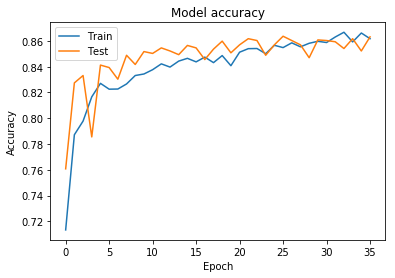

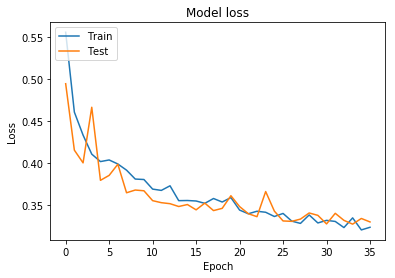

In [12]:
# Plot training & validation accuracy values
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
label=[]
for element in test_ds.as_numpy_iterator():
    for x in element[1]:
        label.append(np.around(x).astype(int))



In [14]:
test_ds.class_names



['0_layout', '1_Genuine']

In [15]:
#Predictions on test set

#y_pred = np.around(model.predict(test_ds)).astype(int)
y_pred = np.load(r'E:\Babette\MasterThesis\Models\VGG16_imgnet_not_trainable\predictions.npy')


In [16]:
type(label)

list

In [17]:
report = skm.classification_report(label, y_pred )
print(report) 


              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1267
           1       0.85      0.92      0.88      1355

   micro avg       0.87      0.87      0.87      2622
   macro avg       0.87      0.87      0.87      2622
weighted avg       0.87      0.87      0.87      2622



In [18]:
#confusion Matrix
cm = skm.confusion_matrix(label, y_pred)
print(cm)


[[1044  223]
 [ 115 1240]]


In [19]:
y_test= label
print('F1 score: ')
print(skm.f1_score(y_test, y_pred, pos_label=1))
print('Precision: ')
print(sklearn.metrics.precision_score(y_test, y_pred, pos_label=1))
print('Recall:')
print(sklearn.metrics.recall_score(y_test, y_pred, pos_label=1))



print('F1 score: ')
print(skm.f1_score(y_test, y_pred, pos_label=0))
print('Precision: ')
print(sklearn.metrics.precision_score(y_test, y_pred, pos_label=0))
print('Recall:')
print(sklearn.metrics.recall_score(y_test, y_pred, pos_label=0))


F1 score: 
0.8800567778566359
Precision: 
0.8475734791524265
Recall:
0.915129151291513
F1 score: 
0.8606760098928277
Precision: 
0.9007765314926661
Recall:
0.823993685872139


In [20]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.8710907704042715

In [ ]:
# load model trained before
#model.load_weights('E:\Babette\MasterThesis\Models\Binary_CNN_model_3.h5')